In [0]:
import torch as t
import torchvision
import torchvision.transforms as tf
from torchvision import datasets

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helper

In [0]:
transform=tf.Compose([tf.ToTensor(),tf.Normalize((0.5,),(0.5,))])

In [0]:

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = t.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


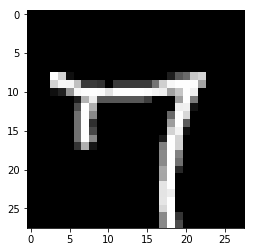

In [6]:
plt.imshow(images[56].numpy().squeeze(), cmap='Greys_r');

In [7]:
input=images.reshape(64,-1)
print(input.shape)

torch.Size([64, 784])


In [35]:

hidden_layer=256
output_layer=10

#weights for hidden and output layer
weights_hidden=t.randn(input.shape[1],hidden_layer)
print("Hidden Layer weights: ",weights_hidden.shape)
weights_output=t.randn(hidden_layer,output_layer)
print("Ouput Layer weights: ",weights_output.shape)

#bias for hidden and output layer
bias_hidden=t.randn(hidden_layer)
print("Hidden Layer Bias: ",bias_hidden.shape)
bias_output=t.randn(output_layer)
print("Output Layer Bias: ",bias_output.shape)

Hidden Layer weights:  torch.Size([784, 256])
Ouput Layer weights:  torch.Size([256, 10])
Hidden Layer Bias:  torch.Size([256])
Output Layer Bias:  torch.Size([10])


In [0]:
def activation(x):
  sigmoid_act=1/(1+t.exp(-x))
  return sigmoid_act

In [37]:
hidden=activation(t.mm(input,weights_hidden)+bias_hidden)
hidden.shape

torch.Size([64, 256])

In [39]:
o=(t.mm(hidden,weights_output)+bias_output)
o.shape

torch.Size([64, 10])

In [0]:
def softmax(x):
  
  softmax_act=t.exp(x)/(t.sum(t.exp(x),dim=1).reshape(-1,1))
  return softmax_act

In [43]:
prob=softmax(o)
t.sum(prob,dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])